In [2]:
import numpy as np
import cv2 as cv

from IPython.display import display
from PIL import Image

from pathlib import Path

def imshow(im):
    display(Image.fromarray(im))

In [3]:
print(f'numpy version: {np.__version__}')
print(f'OpenCV version: {cv.__version__}')

numpy version: 1.24.2
OpenCV version: 4.7.0


In [4]:
import os
IMG_LOCATION = Path(os.path.abspath(''))
image_paths = [IMG_LOCATION / f"capture{i + 1}.tiff" for i in range(10)]

LEFT = 0
RIGHT = 1

frames = [cv.imreadmulti(str(p), flags=cv.IMREAD_UNCHANGED)[1] for p in image_paths]

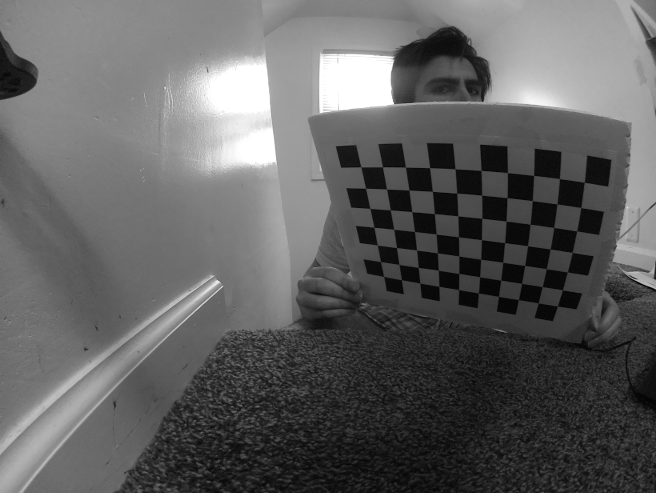

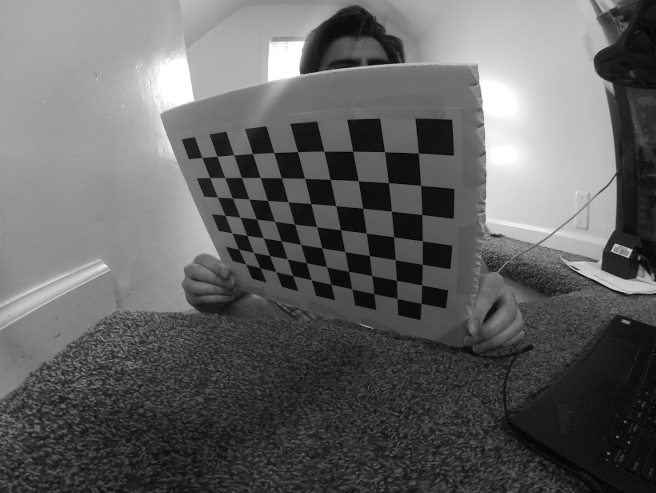

In [5]:
imshow(frames[7][LEFT])
imshow(frames[7][RIGHT])

In [6]:
CORNER_SHAPE = (10, 7)
CORNER_DISTANCE = 2.225  # cm

corners = []
for i, frame in enumerate(frames):
    left, right = frame[0], frame[1]
    left_found, left_corners = cv.findChessboardCorners(left, CORNER_SHAPE, CORNER_SHAPE)
    right_found, right_corners = cv.findChessboardCorners(right, CORNER_SHAPE, CORNER_SHAPE)

    if not left_found or not right_found:
        print(
            f"Failed to find corners on frame {i + 1}: left {'yes' if left_found else 'no'}, right {'yes' if right_found else 'no'}")
        corners.append([])
        continue

    # Refine the corner findings
    cv.cornerSubPix(left, left_corners, (11, 11), (-1, -1),
                    (cv.TERM_CRITERIA_MAX_ITER + cv.TERM_CRITERIA_EPS, 30, 0.01))
    cv.cornerSubPix(right, right_corners, (11, 11), (-1, -1),
                    (cv.TERM_CRITERIA_MAX_ITER + cv.TERM_CRITERIA_EPS, 30, 0.01))

    corners.append([left_corners, right_corners])

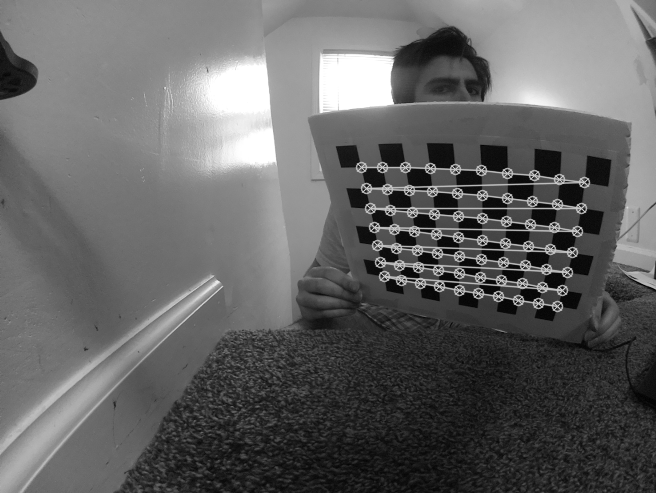

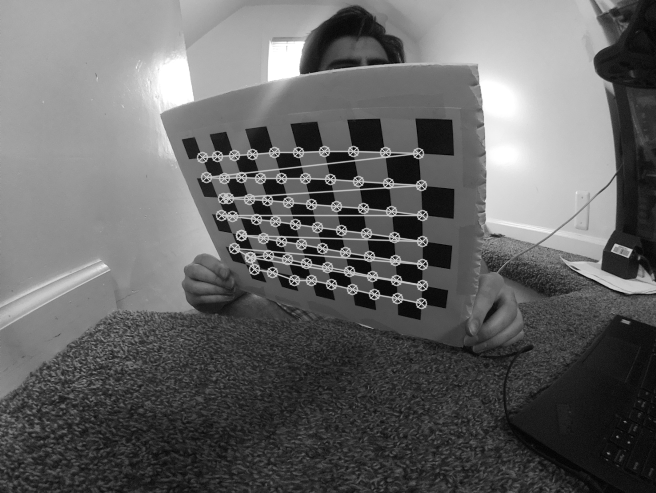

In [7]:
FRAME_TO_DISPLAY = 7
left_annotated = cv.drawChessboardCorners(frames[FRAME_TO_DISPLAY][LEFT].copy(), CORNER_SHAPE,
                                          corners[FRAME_TO_DISPLAY][LEFT], True)
right_annotated = cv.drawChessboardCorners(frames[FRAME_TO_DISPLAY][RIGHT].copy(), CORNER_SHAPE,
                                           corners[FRAME_TO_DISPLAY][RIGHT], True)

imshow(left_annotated)
imshow(right_annotated)

In [8]:
left = frames[FRAME_TO_DISPLAY][LEFT].copy()
right = frames[FRAME_TO_DISPLAY][RIGHT].copy()

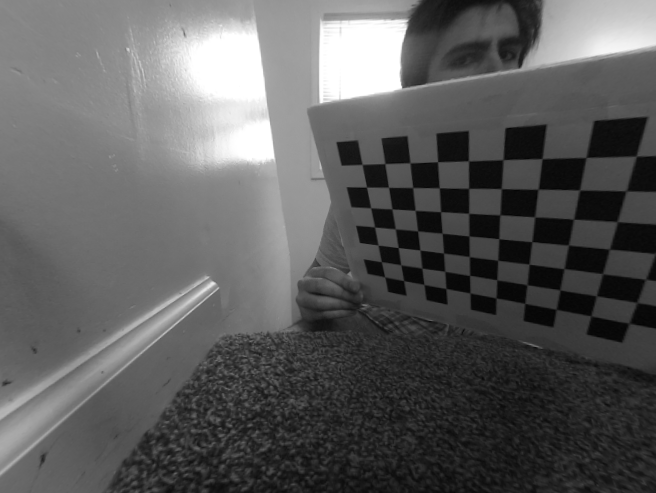

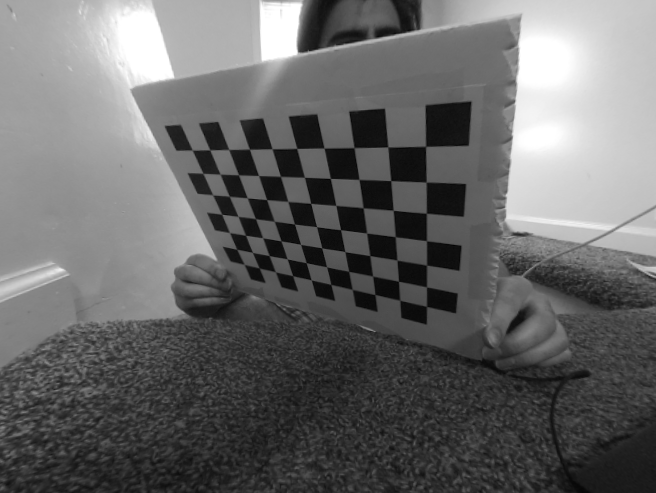

In [74]:
k_left = np.array([[315.81992454,   0.        , 319.72591636],
        [  0.        , 315.81992454, 248.74922547],
        [  0.        ,   0.        ,   1.        ]])
d_left = np.array([[-0.34433178,  0.14788366,  0.        ,  0.        , -0.03315342]])

k_right = np.array([[315.81992454,   0.        , 317.8089399 ],
        [  0.        , 315.81992454, 245.65857314],
        [  0.        ,   0.        ,   1.        ]])
d_right = np.array([[-0.34975363,  0.16341871,  0.        ,  0.        , -0.03570517]])


# Rectify images = 
left_r = cv.undistort(left, k_left, d_left)
right_r = cv.undistort(right, k_right, d_right)
imshow(left_r)
imshow(right_r)

In [111]:
# Compute the disparity map for depth

stereo = cv.StereoSGBM_create(numDisparities=16,
                            blockSize=15)

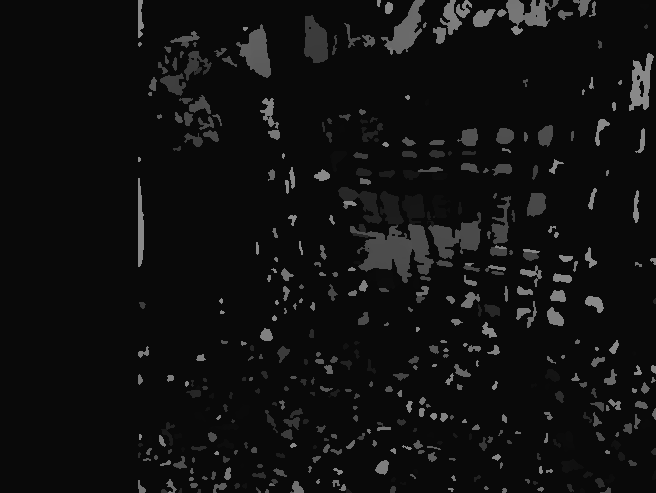

In [122]:
#stereo.setPreFilterType(0)
#stereo.setPreFilterSize(5)
#stereo.setPreFilterCap(29)
stereo.setMinDisparity(10)
stereo.setNumDisparities(128)
#stereo.setTextureThreshold(100)
stereo.setUniquenessRatio(11)
stereo.setSpeckleRange(40)
stereo.setSpeckleWindowSize(12)

disp = stereo.compute(left_r, right_r).astype(np.float32)/16
imshow(disp.astype(np.uint8))

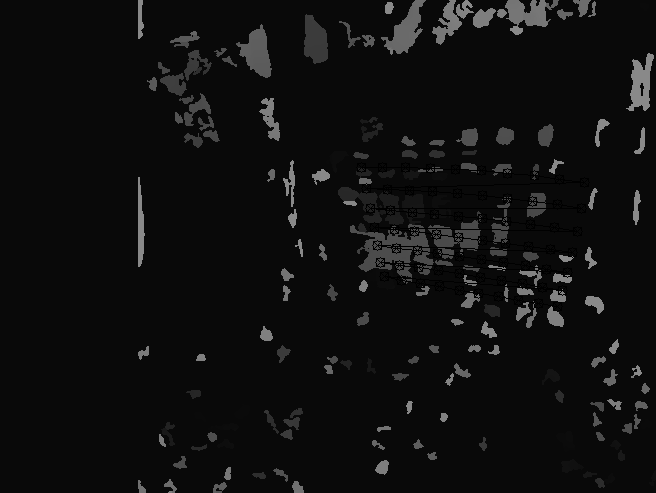

In [116]:
left_annotated = cv.drawChessboardCorners(disp.copy(), CORNER_SHAPE,
                                          corners[FRAME_TO_DISPLAY][LEFT], True)

imshow(left_annotated.astype(np.uint8))

In [12]:
correspondance = np.matmul(X.T, X)
[u, s, v] = np.linalg.svd(correspondance, True)

NameError: name 'X' is not defined

In [ ]:
u.T * v

array([[ 8.03263858e-03,  8.82801041e-03,  9.73468088e-03, ...,
         1.81635134e-02,  1.93462316e-02,  2.05280520e-02],
       [ 1.03437121e-03,  3.56166810e-03,  7.70318834e-03, ...,
         1.12313172e-02,  7.92050734e-03,  5.32823941e-03],
       [-3.33394902e-03, -2.22322578e-03, -2.01178002e-04, ...,
        -6.11273339e-03, -6.32312223e-02, -5.16902842e-02],
       ...,
       [-1.33143016e-03, -5.35627045e-02, -1.61029002e-05, ...,
        -3.01892665e-04, -6.15769438e-03, -2.24748384e-02],
       [ 7.05469698e-02,  2.12180447e-02,  9.53457411e-03, ...,
         1.29306996e-02,  1.42650753e-02,  1.87222194e-03],
       [ 2.84493854e-03,  2.54099518e-02,  2.35887058e-02, ...,
         1.16598485e-02,  4.22416348e-03,  4.75894427e-04]], dtype=float32)